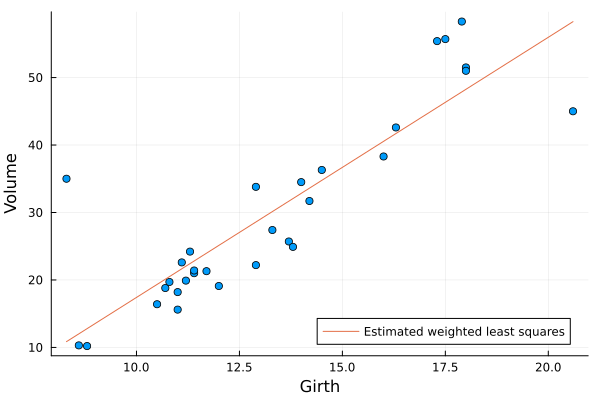

In [9]:
# solving linear ls via QR factorization. EXERCISE FROM nocedal ch 10.
#Credit for this project idea and information is given to UMN, as well as Prof. Darin England.

using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots

# use the data on cherry trees
Trees = CSV.read("cherry-trees.csv", DataFrame)

fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      # the predictors
b = vec(modelmatrix(fo.lhs, Trees)) # the response

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")

# solving linear ls via QR decomposition, see nocedal ch 10 pp 251
function lsqr(A, b, weights = ones(length(b)))
    F = qr(A.* sqrt.(weights))
    Q1 = Matrix(F.Q)  # the first n columns of Q
    R = F.R
    # now A == Q1*R
    # and x = PR^(-1)Q1'y
    x = R \ (Q1'*(b .* sqrt.(weights)))  # triangular substitution to solve Rx = Q1'b
                   # if pivoting was performed, then x = Px
end

x_ls = lsqr(A, b)   # solve using our implementation

fit = lm(fo, Trees)   # check our answer

# plot the two regression lines
scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")
g(x) = x_ls[1] + x_ls[2]*x  # the least squares regression line
plot!(g,
      label = "Estimated weighted least squares",
      legend = :bottomright)
# note the call to plot! reuses the x values and passes them to g()


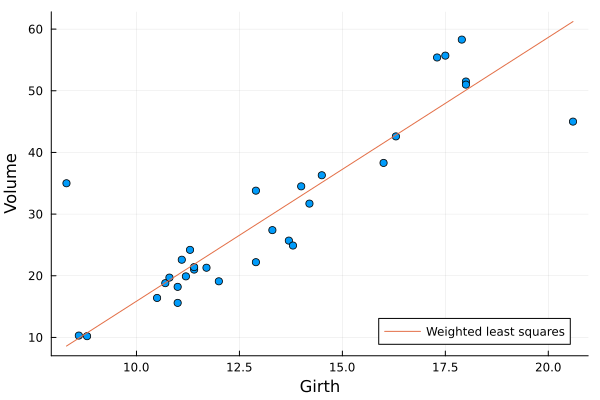

In [7]:
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots

Trees = CSV.read("cherry-trees.csv", DataFrame)
weights = vcat(0.5, ones(29), .5)
fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      
b = vec(modelmatrix(fo.lhs, Trees)) 

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")


function lsqr(A, b, weights)
    F = qr(A.* sqrt.(weights))
    Q1 = Matrix(F.Q)
    R = F.R

    x = R \ (Q1' * (b .* sqrt.(weights)))
                 
end

x_ls = lsqr(A, b, weights)   

fit = lm(fo, Trees)  

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")
g(x) = x_ls[1] + x_ls[2]*x  
plot!(g,
      label = "Weighted least squares",
      legend = :bottomright)


In the above code I added the weights; weights = vcat(0.5, ones(29), .5), and then modified all of the provided formulas to incldue the weights. I also changed the graph key to include weighted least squares, instead of least squares.

The weighted and unweighted least squares look almost the same. I would guess that this is so because only the first and last residual weights were changed to 0.5, and all of the rest were maintained at 5. If more residuals were changed in a tangible way, I would assume that the graphs would look very different from eachother